<a href="https://colab.research.google.com/github/ankit8291/Data-Analysis-/blob/main/IMDb_Movie_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kaggle

In [3]:
#Upload kaggle API tocken
from google.colab import files
files.upload()

{}

In [4]:
# To move the uploaded file to the required directory:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
#Download the Dataset, Copy the dataset's name
!kaggle datasets download -d anandshaw2001/imdb-data

Dataset URL: https://www.kaggle.com/datasets/anandshaw2001/imdb-data
License(s): CC0-1.0
imdb-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#Extract the dataset if it’s in a zip file
!unzip imdb-data.zip

Archive:  imdb-data.zip
replace Imdb Movie Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
# To check the contents of the current directory to confirm the file
!ls

 imdb-data.zip	'Imdb Movie Dataset.csv'   sample_data


In [8]:
#Load the Dataset
import pandas as pd
df = pd.read_csv("Imdb Movie Dataset.csv")

# **Data Cleaning and EDA**

In [9]:
#Top 5 rows
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,7/15/2010,825532764,148,False,160000000,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,11/5/2014,701729206,169,False,165000000,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,7/16/2008,1004558444,152,False,185000000,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,False,237000000,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,4/25/2012,1518815515,143,False,220000000,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [10]:
# To check dimension
df.shape

(1048575, 21)

In [11]:
# Check all columns
df.columns.to_list()

['id',
 'title',
 'vote_average',
 'vote_count',
 'status',
 'release_date',
 'revenue',
 'runtime',
 'adult',
 'budget',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'tagline',
 'genres',
 'production_companies',
 'production_countries',
 'spoken_languages',
 'keywords']

In [12]:
# Checking data integrity
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote_average          1048575 non-null  float64
 3   vote_count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   release_date          866758 non-null   object 
 6   revenue               1048575 non-null  int64  
 7   runtime               1048575 non-null  int64  
 8   adult                 1048575 non-null  bool   
 9   budget                1048575 non-null  int64  
 10  imdb_id               560572 non-null   object 
 11  original_language     1048575 non-null  object 
 12  original_title        1048562 non-null  object 
 13  overview              832751 non-null   object 
 14  popularity            1048575 non-

In [13]:
# checking for null values in each column
df.isna().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,181817
revenue,0
runtime,0
adult,0
budget,0


There are many missing values, we need to eliminate them

In [14]:
# let's check the percentage of missing value in each and every column
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

id                       0.000000
title                    0.001240
vote_average             0.000000
vote_count               0.000000
status                   0.000000
release_date            17.339437
revenue                  0.000000
runtime                  0.000000
adult                    0.000000
budget                   0.000000
imdb_id                 46.539637
original_language        0.000000
original_title           0.001240
overview                20.582600
popularity               0.000000
tagline                 85.434709
genres                  39.574852
production_companies    54.209570
production_countries    44.202561
spoken_languages        42.024843
keywords                72.093460
dtype: float64


In [15]:
# we will drop those columns who have more than or around 20% missing values and are not critical
threshold = 0.8 * len(df)
clean_df = df.dropna(axis = 1, thresh =threshold)

In [16]:
clean_df.columns.to_list()

['id',
 'title',
 'vote_average',
 'vote_count',
 'status',
 'release_date',
 'revenue',
 'runtime',
 'adult',
 'budget',
 'original_language',
 'original_title',
 'popularity']

In [17]:
clean_df.isna().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,181817
revenue,0
runtime,0
adult,0
budget,0


In [18]:
# dropping the other NaN values and stroing it in a new dataframe
# coz we may need release date while analyzing trends over time
new_df = clean_df.dropna()

In [19]:
new_df.shape

(866754, 13)

In [20]:
# Cross checking null values again
new_df.isna().sum()

,0
id,0
title,0
vote_average,0
vote_count,0
status,0
release_date,0
revenue,0
runtime,0
adult,0
budget,0


Now we don't have null values, we can use this dataset.

In [21]:
# Checking for duplicates
new_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1048565,False
1048566,False
1048567,False
1048572,False


We don't find any duplicate values here.

In [22]:
# Descriptive stats for this Data
new_df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,8.667540e+05,866754.000000,866754.00000,8.667540e+05,866754.000000,8.667540e+05,866754.000000
mean,6.768295e+05,2.406110,24.73557,8.656825e+05,54.110325,3.326347e+05,1.465809
std,4.021455e+05,3.212226,364.54434,1.966745e+07,61.480121,5.405704e+06,8.663700
min,2.000000e+00,0.000000,0.00000,-1.200000e+01,0.000000,0.000000e+00,0.000000
25%,3.376635e+05,0.000000,0.00000,0.000000e+00,3.000000,0.000000e+00,0.600000
50%,6.061885e+05,0.000000,0.00000,0.000000e+00,48.000000,0.000000e+00,0.600000
75%,1.031635e+06,5.500000,2.00000,0.000000e+00,91.000000,0.000000e+00,1.111000
max,1.411036e+06,10.000000,34495.00000,3.000000e+09,14400.000000,8.880000e+08,2994.357000


In [23]:
# Approach - a genre with high vote_average and a high vote_count would be considered the most popular.
# Calculating a Popularity Score - we can create a popularity score by multiplying the vote average by the vote count.
# This gives us a weighted score where both the quality of the votes (vote average) and the quantity (vote count) matter.
df['popularity_score'] = df['vote_average'] * df['vote_count']
genre_popularity = df.groupby('genres')['popularity_score'].sum()
most_popular_genre = genre_popularity.sort_values(ascending=False).head(1)
most_popular_genre

,popularity_score
genres,
Drama,7723058.301


In [24]:
# Now trying to get top 20 highest grossing movies (who made maxiumum revenue irrespective of budget)on IMDB
sorted_revenue_df = df.sort_values(by='revenue', ascending = False)
top_grossing_movies = sorted_revenue_df.head(20)
top_grossing_movies

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords,popularity_score
481617,1407985,babben: the movie,0.000,0,Released,NaN,4999999999,999,False,100,...,babben: the movie,the cool movie about babben its very specilala...,0.600,babben,NaN,NaN,NaN,NaN,NaN,0.000
707555,1224207,Adventures in Bora Bora,0.000,0,Released,8/23/2023,3000000000,5,False,800000000,...,Adventures in Bora Bora,"The adventures in Bora Bora, is an astonishing...",0.000,(English),"Horror, War",NaN,NaN,English,NaN,0.000
234307,1270893,TikTok Rizz Party,10.000,1,Released,4/1/2024,3000000000,180,False,250000000,...,TikTok Rizz Party,"a band of brothers, torn apart by the constant...",0.000,NaN,"Drama, Comedy",Warner Bros.,United States of America,NaN,"party, tiktok, rizz",10.000
560984,1236552,Bee Movie,0.000,0,Released,NaN,2930000000,91,False,150000000,...,Bee Movie,"Fresh out of college, Barry the Bee finds the ...",1.400,"""Get the nectar, make the honey, get the polle...",NaN,NaN,NaN,NaN,NaN,0.000
3,19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,False,237000000,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",225788.995
15,299534,Avengers: Endgame,8.263,23857,Released,4/24/2019,2800000000,181,False,356000000,...,Avengers: Endgame,After the devastating events of Avengers: Infi...,91.756,Avenge the fallen.,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa","superhero, time travel, space travel, time mac...",197130.391
282,76600,Avatar: The Way of Water,7.654,9830,Released,12/14/2022,2320250281,192,False,460000000,...,Avatar: The Way of Water,Set more than a decade after the events of the...,241.285,Return to Pandora.,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English,"dying and death, loss of loved one, alien life...",75238.820
17,597,Titanic,7.900,23637,Released,11/18/1997,2264162353,194,False,200000000,...,Titanic,101-year-old Rose DeWitt Bukater tells the sto...,102.348,Nothing on Earth could come between them.,"Drama, Romance","Paramount, 20th Century Fox, Lightstorm Entert...",United States of America,"English, French, German, Swedish, Italian, Rus...","epic, ship, drowning, panic, shipwreck, evacua...",186732.300
56,140607,Star Wars: The Force Awakens,7.293,18352,Released,12/15/2015,2068223624,136,False,245000000,...,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,66.772,Every generation has a story.,"Adventure, Action, Science Fiction","Lucasfilm Ltd., Bad Robot",United States of America,English,"android, spacecraft, space opera",133841.136
6,299536,Avengers: Infinity War,8.255,27713,Released,4/25/2018,2052415039,149,False,300000000,...,Avengers: Infinity War,As the Avengers and their allies have continue...,154.340,An entire universe. Once and for all.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa","sacrifice, magic, superhero, based on comic, s...",228770.815


In [25]:
# Now let's just try to find out the top 20 movies who made maximum profit
df['profit']  = df['revenue'] - df['budget']
highest_profit_movies = df.sort_values(by='profit', ascending = False)
highest_profit_movies.head(20)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords,popularity_score,profit
481617,1407985,babben: the movie,0.000,0,Released,NaN,4999999999,999,False,100,...,the cool movie about babben its very specilala...,0.600,babben,NaN,NaN,NaN,NaN,NaN,0.000,4999999899
560984,1236552,Bee Movie,0.000,0,Released,NaN,2930000000,91,False,150000000,...,"Fresh out of college, Barry the Bee finds the ...",1.400,"""Get the nectar, make the honey, get the polle...",NaN,NaN,NaN,NaN,NaN,0.000,2780000000
234307,1270893,TikTok Rizz Party,10.000,1,Released,4/1/2024,3000000000,180,False,250000000,...,"a band of brothers, torn apart by the constant...",0.000,NaN,"Drama, Comedy",Warner Bros.,United States of America,NaN,"party, tiktok, rizz",10.000,2750000000
3,19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,False,237000000,...,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",225788.995,2686706026
15,299534,Avengers: Endgame,8.263,23857,Released,4/24/2019,2800000000,181,False,356000000,...,After the devastating events of Avengers: Infi...,91.756,Avenge the fallen.,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa","superhero, time travel, space travel, time mac...",197130.391,2444000000
707555,1224207,Adventures in Bora Bora,0.000,0,Released,8/23/2023,3000000000,5,False,800000000,...,"The adventures in Bora Bora, is an astonishing...",0.000,(English),"Horror, War",NaN,NaN,English,NaN,0.000,2200000000
17,597,Titanic,7.900,23637,Released,11/18/1997,2264162353,194,False,200000000,...,101-year-old Rose DeWitt Bukater tells the sto...,102.348,Nothing on Earth could come between them.,"Drama, Romance","Paramount, 20th Century Fox, Lightstorm Entert...",United States of America,"English, French, German, Swedish, Italian, Rus...","epic, ship, drowning, panic, shipwreck, evacua...",186732.300,2064162353
552794,1326885,Best Of Joy,0.000,0,Released,12/25/2024,2000000000,120,False,1000,...,When his biggest show inches closer and closer...,0.000,"It was the Best of Joy, it was the Worst of Joy","Drama, Music",Siba Media,NaN,English,NaN,0.000,1999999000
282,76600,Avatar: The Way of Water,7.654,9830,Released,12/14/2022,2320250281,192,False,460000000,...,Set more than a decade after the events of the...,241.285,Return to Pandora.,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English,"dying and death, loss of loved one, alien life...",75238.820,1860250281
56,140607,Star Wars: The Force Awakens,7.293,18352,Released,12/15/2015,2068223624,136,False,245000000,...,Thirty years after defeating the Galactic Empi...,66.772,Every generation has a story.,"Adventure, Action, Science Fiction","Lucasfilm Ltd., Bad Robot",United States of America,English,"android, spacecraft, space opera",133841.136,1823223624


# **Visualizing trend over time.**

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866754 entries, 0 to 1048573
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 866754 non-null  int64  
 1   title              866754 non-null  object 
 2   vote_average       866754 non-null  float64
 3   vote_count         866754 non-null  int64  
 4   status             866754 non-null  object 
 5   release_date       866754 non-null  object 
 6   revenue            866754 non-null  int64  
 7   runtime            866754 non-null  int64  
 8   adult              866754 non-null  bool   
 9   budget             866754 non-null  int64  
 10  original_language  866754 non-null  object 
 11  original_title     866754 non-null  object 
 12  popularity         866754 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 86.8+ MB


In [29]:
# Checking datatype
new_df.dtypes

,0
id,int64
title,object
vote_average,float64
vote_count,int64
status,object
release_date,object
revenue,int64
runtime,int64
adult,bool
budget,int64


We need to change release_date to datetime type

In [34]:
new_df = new_df.copy()
new_df['release_date'] = pd.to_datetime(new_df['release_date'], errors = 'coerce')
new_df.dtypes

,0
id,int64
title,object
vote_average,float64
vote_count,int64
status,object
release_date,datetime64[ns]
revenue,int64
runtime,int64
adult,bool
budget,int64


In [44]:
print(new_df.dtypes)
print('\nMissing dates count', new_df['release_date'].isna().sum())

id                            int64
title                        object
vote_average                float64
vote_count                    int64
status                       object
release_date         datetime64[ns]
revenue                       int64
runtime                       int64
adult                          bool
budget                        int64
original_language            object
original_title               object
popularity                  float64
release_data         datetime64[ns]
dtype: object

Missing dates count 1970


We need to drop the missing release date values.

In [46]:
new_df = new_df.dropna(subset=['release_date'])
new_df['release_date'].isna().sum()

0

Now we have data with release dates.

Now we will extract year, month, day and quarter from release_date.

In [47]:
# extracting year, month, day and quarter
new_df['year'] = new_df['release_date'].dt.year
new_df['month'] = new_df['release_date'].dt.month
new_df['day'] = new_df['release_date'].dt.day
new_df['quarter'] = new_df['release_date'].dt.quarter
# let's check new added columns in the dataframe
new_df[['release_date','year','month','day','quarter']].head()

,release_date,year,month,day,quarter
0,2010-07-15,2010,7,15,3
1,2014-11-05,2014,11,5,4
2,2008-07-16,2008,7,16,3
3,2009-12-15,2009,12,15,4
4,2012-04-25,2012,4,25,2


In [48]:
# sorting release_date column,
sorted_new_df = new_df.sort_values(by='release_date')
# verifying sorting
sorted_new_df[['title','release_date']].head()

,title,release_date
974675,Iphigénie en Tauride.,1900-01-01
974669,Le Maître de ballet,1900-01-01
974673,Les Précieuses ridicules,1900-01-01
974674,Little Tich de Folies Bergère,1900-01-01
42692,The Doctor and the Monkey,1900-01-01


In [49]:
# let's analyze year trend
movies_per_year = sorted_new_df.groupby('year').size()
movies_per_year

,0
year,
1900,387
1901,264
1902,228
1903,328
1904,273
...,...
2055,1
2057,1
2061,1


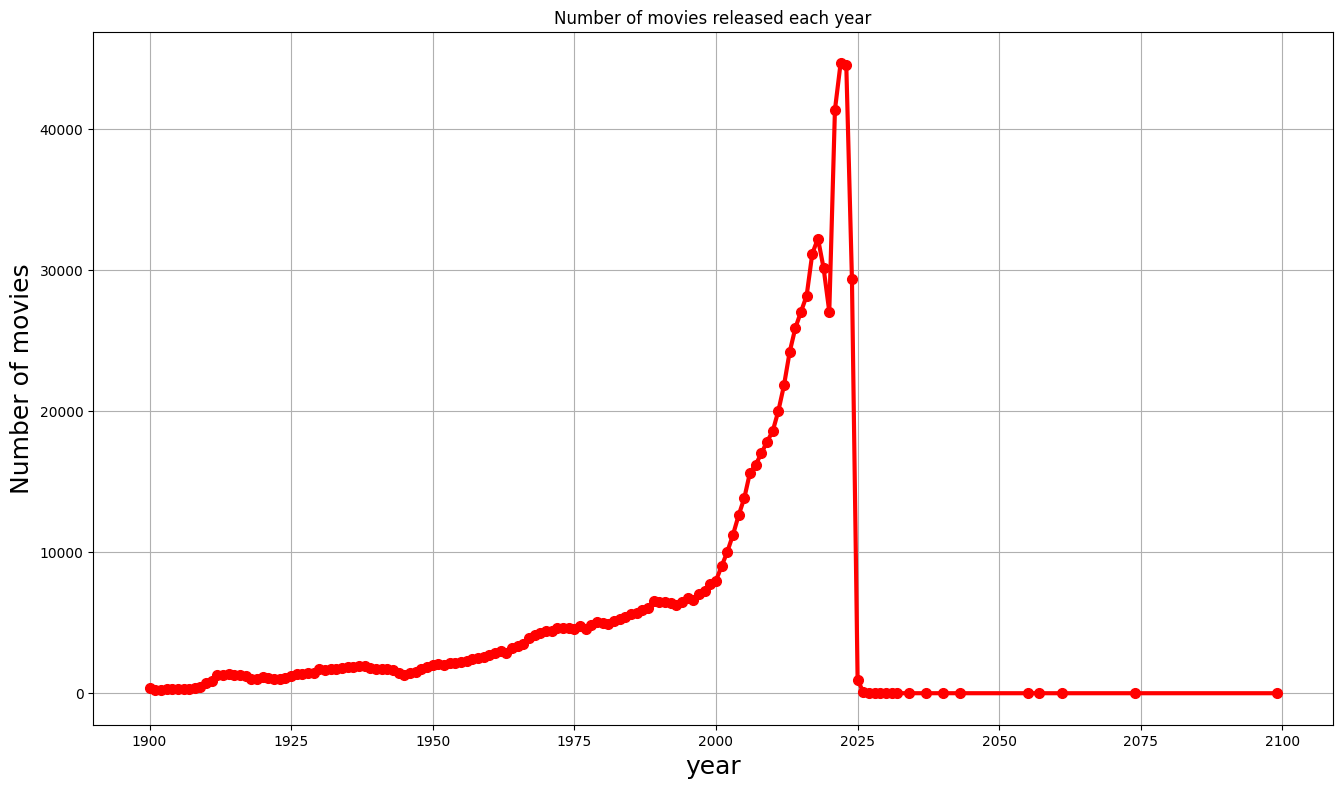

In [63]:
# Number of movies released each year using matplotlib
plt.figure(figsize=(16,9))
movies_per_year.plot(kind = 'line', marker = 'o', color = 'r', markersize = 7, linewidth = 3, linestyle = '-')
plt.title('Number of movies released each year')
plt.xlabel('year', fontsize = 18)
plt.ylabel('Number of movies', fontsize = 18)
plt.grid(True)
plt.show()

We can see in the time span of 200 years between 1900 and 2100, maximum number of movies are released in between 2000 and 2025. Peak is somewhere between 2020 and 2025.

In [67]:
import plotly.express as px

# visualizing same trend using plotly
fig = px.line(
    x=movies_per_year.index,
    y=movies_per_year,
    labels={'x': 'Year', 'y': 'Number of Movies'},
    title='Number of Movies Released per Year'
)
fig.update_traces(line=dict(color='blue'))
fig.show()

In [69]:
# To analyze budget each year
budget_each_year = sorted_new_df.groupby('year')['budget'].sum()
budget_each_year

,budget
year,
1900,1
1901,0
1902,5985
1903,150
1904,7500
...,...
2055,0
2057,0
2061,0


In [70]:
# Visualizing it using plotly
fig = px.line(x=budget_each_year.index, y=budget_each_year, labels={'x': 'Year', 'y': 'Budget Every Year'},
              title='Budget of movies Released per Year')
fig.update_traces(line=dict(color='blue'))
fig.show()

Budget for movies each year can be analysed with peak during 2016 accounting 12.24B.

In [72]:
# To analyze revenue each year
revenue_each_year = sorted_new_df.groupby('year')['revenue'].sum()
revenue_each_year

,revenue
year,
1900,0
1901,0
1902,0
1903,0
1904,0
...,...
2055,0
2057,0
2061,0


In [73]:
# Analyzing revenue trend over years.
fig = px.line(x=revenue_each_year.index, y=revenue_each_year, labels={'x': 'Year', 'y': 'Revenue Every Year'},
              title='Revenue of movies Released per Year')
fig.update_traces(line=dict(color='red'))
fig.show()

Maximum Revenue was also made in year 2017 accounting 34.05B, very similar to budget allocated.